## Inna Khasin - Final Paper
___

### Introduction
This jupyter notebook deals with the task of finding out if there is a difference between the wages of men and women.  
The null hypothesis is that there is no difference, while the alternative hypothesis is that the wages of men are higher.

H0: mu_men = mu_women  
H1: mu_men > mu_women

The data used for this task was obtained from kaggle Irvine [HERE](https://www.kaggle.com/ljanjughazyan/wages).  
The data set, published on kaggle in 2017, is comprised of nearly 1,400 observations with 1 response/dependent variable (earn) and 5 explanatory/independent variables (height(in inches), sex,	race,	ed (years of education), age).  

This notebook consists of three main sections:
- Exploratory Data Analysis 
    - Distribution analysis of all the variables
    - Linearity analysis of the independent variables with the dependent variable
- Regression Model Construction 
- Conclusion

### Section I: Exploratory Data Analysis

In [1]:
#load pandas and numpy libraries
import pandas as pd 
import numpy as np

#load the dataset from a file uploaded to my GitHub repo
wages_df = pd.read_csv("https://raw.githubusercontent.com/InnaKhasin/Final_Paper/main/wages.csv")

#check the dataset uploaded as expected
wages_df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [2]:
#check shape
wages_df.shape

(1379, 6)

In [3]:
#round the values in 'earn' column
wages_df['earn'] = wages_df['earn'].astype(int) 
#check
wages_df.head()

,earn,height,sex,race,ed,age
0,79571,73.89,male,white,16,49
1,96396,66.23,female,white,16,62
2,48710,63.77,female,white,16,33
3,80478,63.22,female,other,16,95
4,82089,63.08,female,white,17,43


In [4]:
#check for null values in the dataset
wages_df.isnull().sum()

earn      0
height    0
sex       0
race      0
ed        0
age       0
dtype: int64

In [5]:
#show dataset summary statistics
wages_df.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32445.796954,66.592640,13.354605,45.328499
std,31257.057617,3.818108,2.438741,15.789715
min,-98.000000,57.340000,3.000000,22.000000
25%,10538.000000,63.720000,12.000000,33.000000
50%,26877.000000,66.050000,13.000000,42.000000
75%,44505.500000,69.315000,15.000000,55.000000
max,317949.000000,77.210000,18.000000,95.000000


The dataset has no null values or missing values for any of the variables.  
Except for 'sex' and 'race', the variables are all numerical variables. 

In [6]:
#load plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

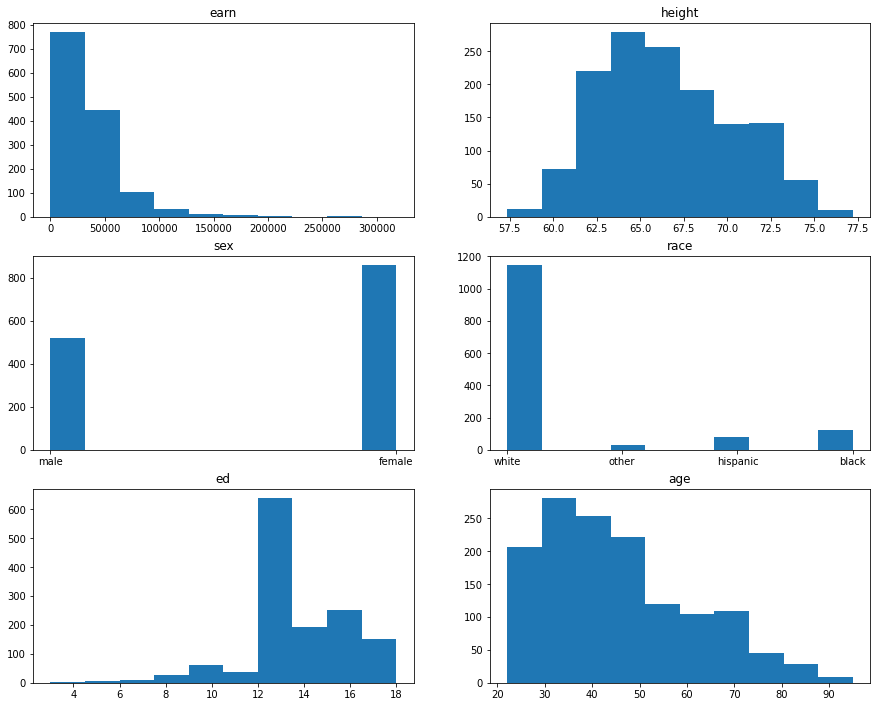

In [7]:
#plot histograms of all the variables, to view their distribution

#define a figure to which we will add a histogram for each of our attributes
plt.figure(figsize=(15,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=wages_df.columns.tolist()
for k in columns :   #for each column in the dataframe graph a histogram 
    plt.subplot(6,2,j) 
    plt.hist(wages_df[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

The distribution of the independent variables from the histograms above:  
- 'height' has a roughly Normal distribution
- 'ed' has a Left skewed distribution  
- 'age' has a Right skewed distribution 
- 'sex' is a Categorical variable with two categories
- 'race' is a Categorical variable with four categories
The distribution of the dependent variable from the histogram above:
- 'earn' has a Right skewed distribution 

Since the dependent variable 'earn' has a Right skewed distribution , it is likely that the independent variable 'age' who also has a Right skewed distribution will be a good predictor, better than the other independent variables 'height' and 'ed'. 

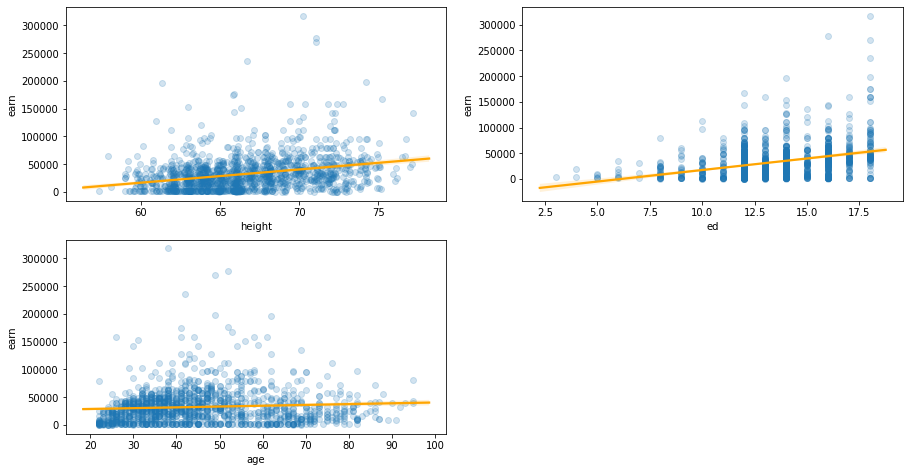

In [8]:
#plot scatterplots of all the numerical independent variables, with the dependant variable

#define a figure to which we will add the scatterplots
plt.figure(figsize=(15,25))

#use an index to identify the spot of the subplot
j=1

for k in ['height','ed','age'] :   #for each column in the dataframe graph a scatterplot 
    plt.subplot(6,2,j) 
    sns.regplot(wages_df[k],wages_df.earn,data=wages_df,scatter_kws={'alpha': 0.2},line_kws={'color': 'orange'})
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

The Scatter plots above show that all three variables 'height', 'ed', 'age' have a relatively weak positive linear relationship with the dependent variable 'earn'. The variable with the strongest positive linear relationship is 'ed' (years of education).

In [9]:
#view correlation matrix for the numerical variables in the dataset
corrMatrix = wages_df[['earn','height','ed','age']].corr()
corrMatrix

,earn,height,ed,age
earn,1.000000,0.291601,0.350373,0.074003
height,0.291601,1.000000,0.114047,-0.133727
ed,0.350373,0.114047,1.000000,-0.129802
age,0.074003,-0.133727,-0.129802,1.000000


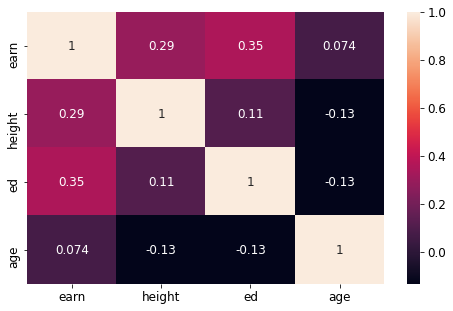

In [10]:
#show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(8,5)}) #set plot parameters
fig = sns.heatmap(corrMatrix, annot=True)
#show plot
plt.show() 

The correlation heatmap above shows:  
- The dependent variable 'earn' has the highest correlation with independent variables 'ed' & 'height'
- The independent variables have low correlations which each other meaning they are not collinear, and adding more than one of these variables to the model would add value to the model

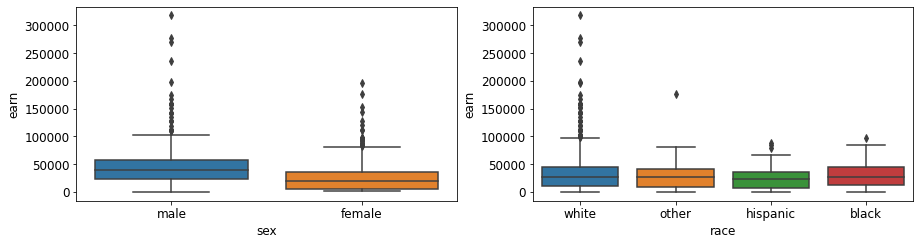

In [11]:
#plot boxplot of each of the categorical variables against the target variable to identify independence.

#define a figure to which we will add the scatterplots
plt.figure(figsize=(15,25))

#use an index to identify the spot of the subplot
j=1

for k in ['sex','race'] :   #for each column in the dataframe graph a boxplot 
    plt.subplot(6,2,j) 
    sns.boxplot(data=wages_df, x=k, y='earn')
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the boxplots above the attribute 'sex' should be a good predictor for 'earn', while 'race' will not be a good predictor. Therefore, 'race' will not be included in the regression model. 

In [12]:
#keep a copy of the original dataset
wages_df_original = wages_df.copy()

#remove outliers from the dataset for all the variables 
#defined as any data point that is:
#more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile

#remove for 'earn'
IQ3=wages_df.earn.quantile(0.75)
IQ1=wages_df.earn.quantile(0.25)
IQR=(IQ3-IQ1)*1.5
earn_outliers_index = wages_df[((wages_df.earn<(IQ1-IQR)) | (wages_df.earn>(IQ3+IQR)))].index
wages_df.drop(earn_outliers_index, inplace=True)

#remove for 'height'
IQ3=wages_df.height.quantile(0.75)
IQ1=wages_df.height.quantile(0.25)
IQR=(IQ3-IQ1)*1.5
height_outliers_index = wages_df[((wages_df.height<(IQ1-IQR)) | (wages_df.height>(IQ3+IQR)))].index
wages_df.drop(height_outliers_index, inplace=True)

#remove for 'ed'
IQ3=wages_df.ed.quantile(0.75)
IQ1=wages_df.ed.quantile(0.25)
IQR=(IQ3-IQ1)*1.5
ed_outliers_index = wages_df[((wages_df.ed<(IQ1-IQR)) | (wages_df.ed>(IQ3+IQR)))].index
wages_df.drop(ed_outliers_index, inplace=True)

#remove for 'age'
IQ3=wages_df.age.quantile(0.75)
IQ1=wages_df.age.quantile(0.25)
IQR=(IQ3-IQ1)*1.5
age_outliers_index = wages_df[((wages_df.age<(IQ1-IQR)) | (wages_df.age>(IQ3+IQR)))].index
wages_df.drop(age_outliers_index, inplace=True)

#show new length
wages_df.shape

(1306, 6)

### Section II: Regression Model Construction

Based on the findings from the Exploratory Data Analysis, the regression model will be constructed with the numerical independent variables 'height', 'ed', 'age' and with the categorical variable 'sex' as predictors of the dependent variable 'earn'.

First, transform 'sex' into a binary variable, so that it can be included in a linear regression model.

In [13]:
#transform 'sex' into binary variable: 1=male, 0=female
wages_df_reg = wages_df.copy()
wages_df_reg.sex.replace({'male': 1, 'female': 0},inplace=True)
#rename 'sex' column 
wages_df_reg.rename(columns={"sex": "sex_male"},inplace=True)
#check results
wages_df_reg.head()

,earn,height,sex_male,race,ed,age
0,79571,73.89,1,white,16,49
2,48710,63.77,0,white,16,33
4,82089,63.08,0,white,17,43
5,15313,64.53,0,white,15,30
6,47104,61.54,0,white,12,53


**Construction of the model**  
A multiple linear regression line is estimated using the formula:  
$y' = a + b1x1 + b2x2 + .. +bnxn$      

In this regression model:  
earn $' = a + b1*$sex_male $ +$ $b2*$height $ +$ $b3*$ed $ +$ $b4*$age

In [14]:
#import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
#use the statsmodels 'formula' api to specify the linear model and fit the model:
model = smf.ols('earn ~ sex_male+height+ed+age', data=wages_df_reg).fit()

#print a summary of the fitted model 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           3.51e-80
Time:                        10:29:47   Log-Likelihood:                -14725.
No. Observations:                1306   AIC:                         2.946e+04
Df Residuals:                    1301   BIC:                         2.949e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.073e+04   1.31e+04     -5.384      0.0

In the statsmoels summary of the regression model above, we see that all the model coefficients are statistically significant since they have a P_value < 0.05. 

**Model diagnostics**  
To assess whether the linear model is reliable, we need check for linearity, nearly normal residuals, and constant variability.  
We checked for linearity during the Exploratory Data Analysis, now we need to verify that the other conditions are reasonable using diagnostic plots.

In [16]:
#generate predictions on training data
y_predicted = model.predict(wages_df_reg[['sex_male','height','ed','age']])

#extract residuals (change wages_df_reg['earn'] to a 1 dimentional object)
residuals = wages_df_reg['earn'].T.squeeze()-y_predicted

#create a dataframe to plot the residuals with seaborn 
y_predicted.rename("y_predicted", inplace= True)
residuals.rename("residuals",inplace= True)
resid_predicted_data = pd.concat([residuals.to_frame(),y_predicted.to_frame()],axis=1)

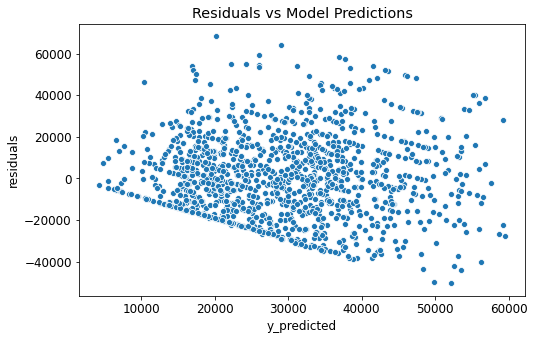

In [17]:
#set plot parameters
plt.rcParams.update({'figure.figsize':(8,5)}) 
#plot a scatterplot of the residulas vs y_predicted
sns.scatterplot(x='y_predicted', y='residuals', data=resid_predicted_data)
plt.title("Residuals vs Model Predictions")
#show plot
plt.show()

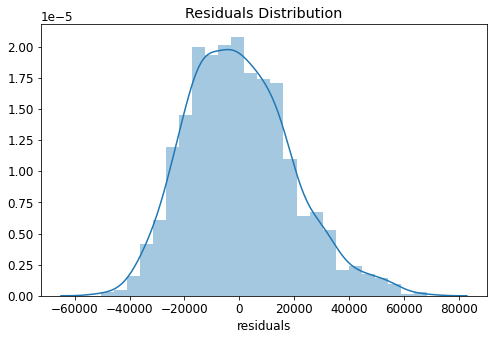

In [18]:
# plot a histogram of the residuals 
sns.distplot(resid_predicted_data["residuals"])
plt.title("Residuals Distribution")
# show plot
plt.show()

The scatterplot and histogram above show:

- Nearly normal distribution of residuals
- Roughly constant variability of residuals

Therefore, the regression model is valid.

### Section III: Conclusion
The coefficient of variable 'sex_male' in the regression model - 12,750 - is positive, meaning that if all other variables are kept constant between two observations but one is male and the other is female - the wages of the male will be predicted to be $12,750 higher.     
Since the P-value of the coefficient in less than 0.05 we can reject the null hypothesis, and accept the alternative.

There is a significant difference between the wages of men and women, with mens wages being higher than those of women.